In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


# **환경설정**

In [2]:
# 라이브러리 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [3]:
# plot 설정
sns.set_style('darkgrid')
sns.set_palette('pastel')

In [4]:
# 경고메시지 설정
import warnings
warnings.filterwarnings(action='ignore')

# **데이터 불러오기**

In [5]:
train_df = pd.read_csv('../input/bike-sharing-demand/train.csv')
test_df = pd.read_csv('../input/bike-sharing-demand/test.csv')

# **데이터 확인**

* train_df: float64(3), int64(8), object(1)
* test_df: float64(3), int64(5), object(1)

* col 정보
    * datatime | hourly data+timestamp
    * season | 1=봄, 2=여름, 3=가을, 4=겨울
    * holiday | 1=주말을 제외한 국경일 등의 휴일, 0=휴일이 아닌 날
    * workingday | 1=주말 및 휴일이 아닌 주중, 0=주말 및 휴일
    * weather | 1=맑음, 약간 구름 낀 흐림, 2=안개, 안개+흐림, 3=가벼운 눈, 가벼운 비+천둥, 4=심한 눈/비, 천둥/번개
    * temp | 온도(섭씨)
    * atemp | 체감온도(섭씨)
    * humidity | 상대습도
    * windspeed | 풍속
    * casual(only train) | 사전에 등록되지 않은 사용자가 대여한 횟수
    * registered(only train) | 사전에 등록된 사용자가 대여한 횟수
    * count(only train) | 대여 횟수 

In [6]:
# train_df 데이터 정보 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
# test_df 데이터 정보
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [8]:
# train_df 기술통계값 산출 (include='all')
train_df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [9]:
# 데이터 구조 확인 
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
# 결측값 확인 
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# **상관관계 도출**

In [11]:
# 데이터 분리
numerical = train_df.select_dtypes(exclude='object')
numerical_col = numerical.columns

categorical = train_df.select_dtypes(include='object')
categorical_col = categorical.columns

<Axes: >

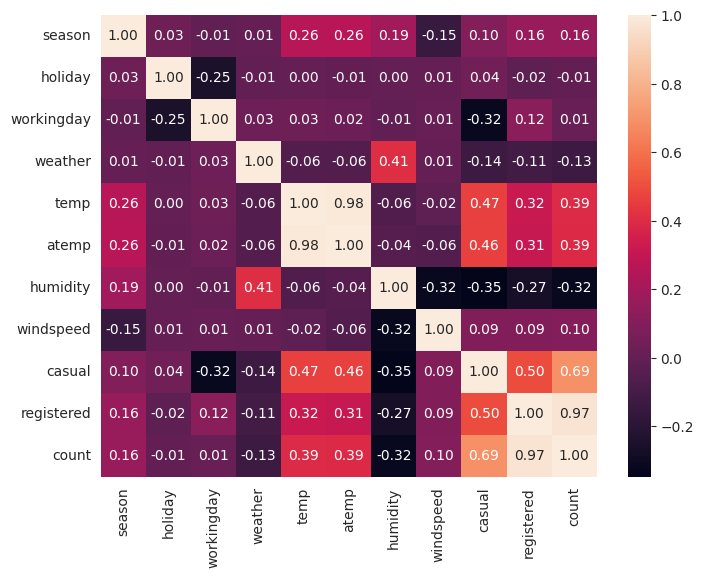

In [12]:
# 상관관계 시각화
    # 다중공선성 확인: temp-atemp
    # 주요 변인 상관관계 높은 변인: registered-casual-temp-atemp
corr = numerical.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f')

# **데이터 처리**

In [13]:
# 데이터 타입 변환
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

train_df.datetime.dtype

dtype('<M8[ns]')

In [14]:
# 'datetime' 분리
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['minute'] = train_df['datetime'].dt.minute
train_df['second'] = train_df['datetime'].dt.second
train_df['dayofweek'] = train_df['datetime'].dt.dayofweek

test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['day'] = test_df['datetime'].dt.day
test_df['hour'] = test_df['datetime'].dt.hour
test_df['minute'] = test_df['datetime'].dt.minute
test_df['second'] = test_df['datetime'].dt.second
test_df['dayofweek'] = test_df['datetime'].dt.dayofweek

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

# **데이터 시각화**

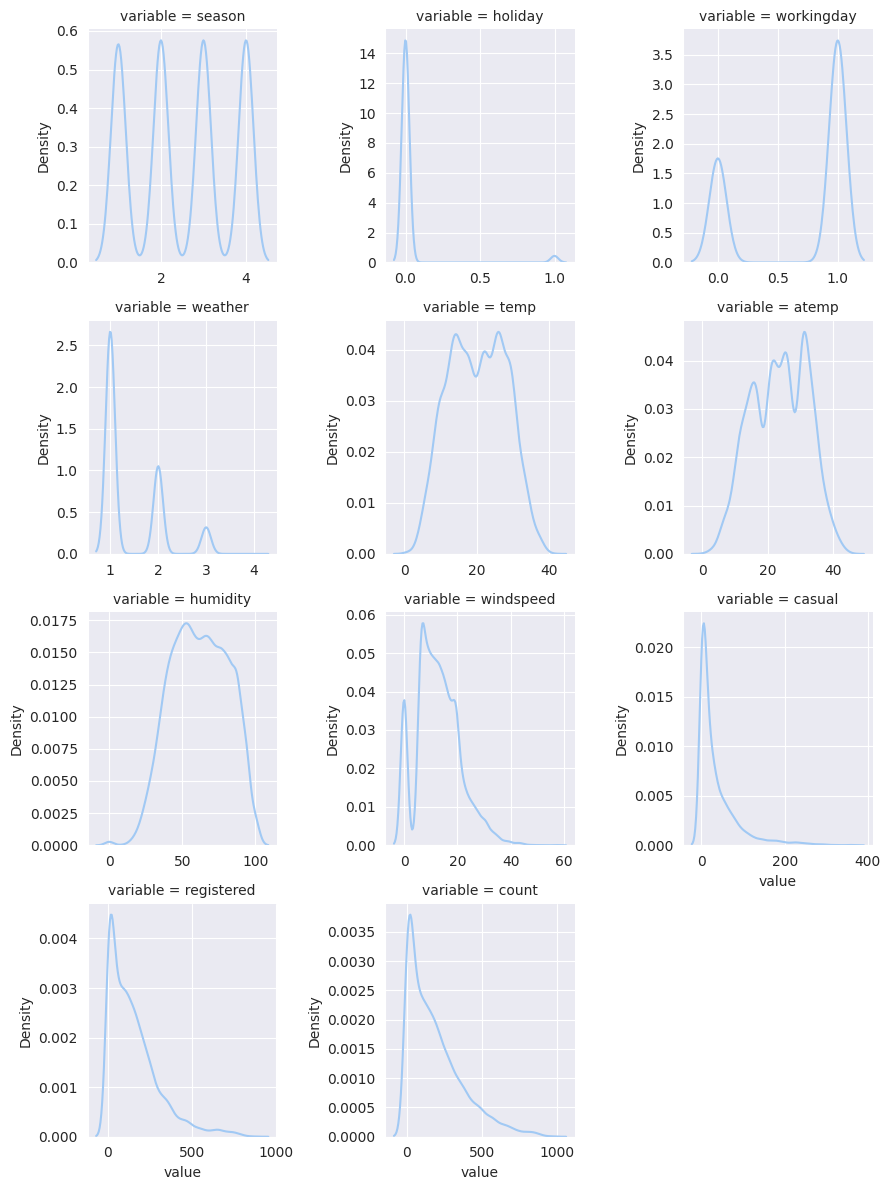

In [15]:
# 데이터 분포 확인
f = pd.melt(train_df, value_vars=numerical)
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)

g.map(sns.kdeplot, 'value')

<Axes: xlabel='humidity', ylabel='count'>

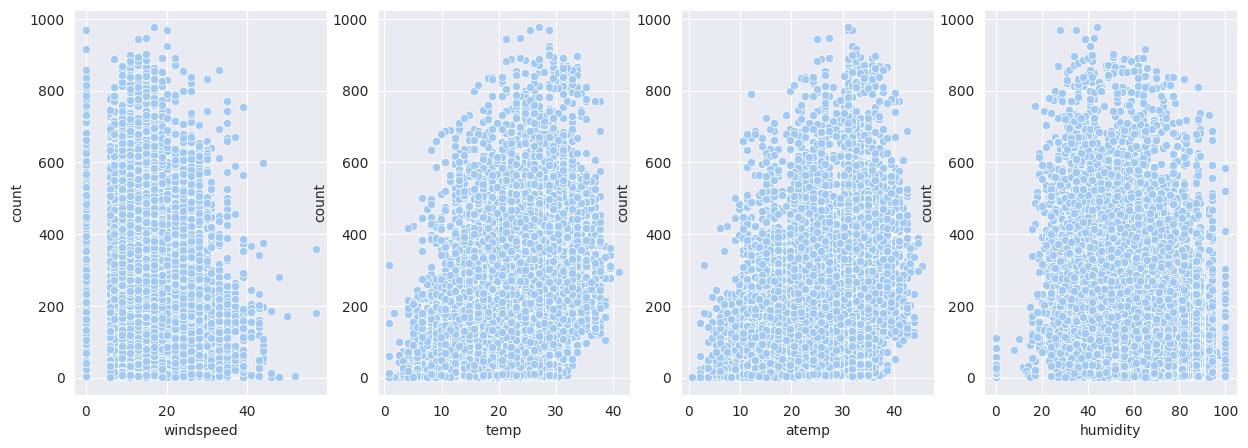

In [16]:
# 온도, 습도, 바람세기 데이터 분포 
    # 1. windspeed=0을 가지는 데이터가 매우 많음 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(15,5))

sns.scatterplot(data=train_df, x='windspeed', y='count', ax=ax1)
sns.scatterplot(data=train_df, x='temp', y='count', ax=ax2)
sns.scatterplot(data=train_df, x='atemp', y='count', ax=ax3)
sns.scatterplot(data=train_df, x='humidity', y='count', ax=ax4)

## **요인별 자전거 수요량 시각화**

<Axes: xlabel='season', ylabel='count'>

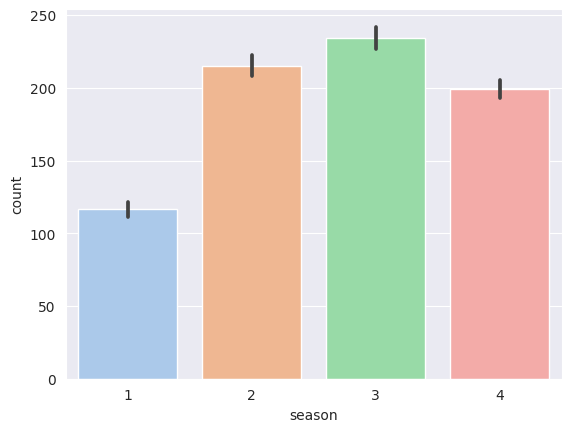

In [17]:
# 계절별 자전거 수요량
sns.barplot(data=train_df, x='season', y='count')

<Axes: xlabel='month', ylabel='count'>

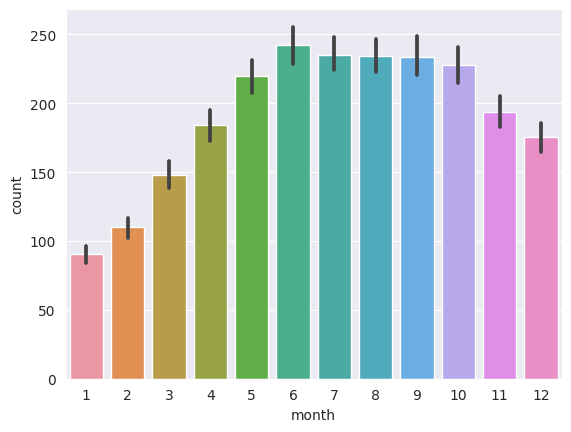

In [18]:
# 월별 자전거 수요량
sns.barplot(data=train_df, x='month', y='count')

<Axes: xlabel='day', ylabel='count'>

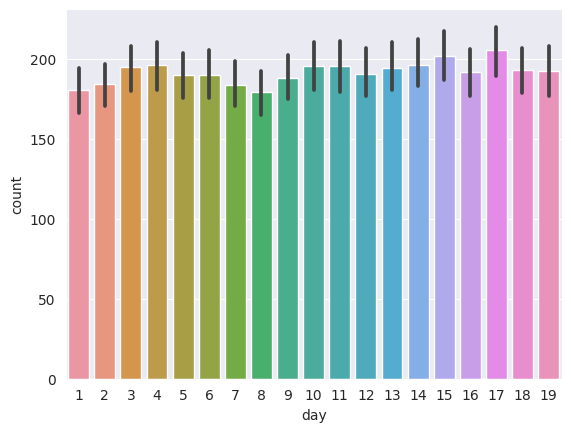

In [19]:
# 일별 자전거 수요량
sns.barplot(data=train_df, x='day', y='count')

<Axes: xlabel='hour', ylabel='count'>

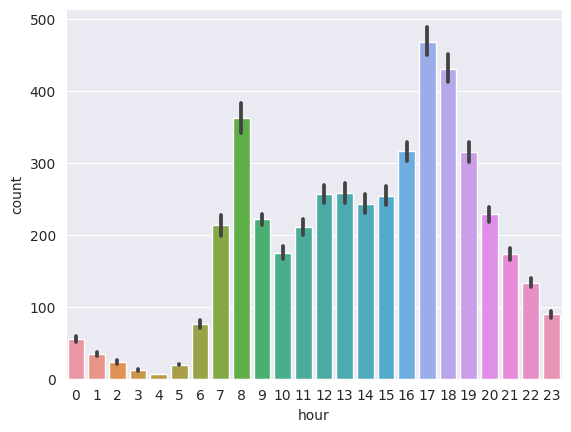

In [20]:
# 시간별 자전거 수요량
sns.barplot(data=train_df, x='hour', y='count')

<Axes: xlabel='dayofweek', ylabel='count'>

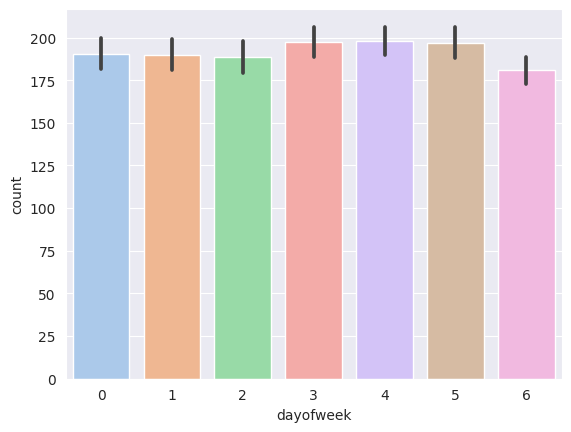

In [21]:
# 요일별 자전거 수요량 
sns.barplot(data=train_df, x='dayofweek', y='count')

## **복합 요인 간 자전거 수요량 시각화**

<Axes: xlabel='hour', ylabel='count'>

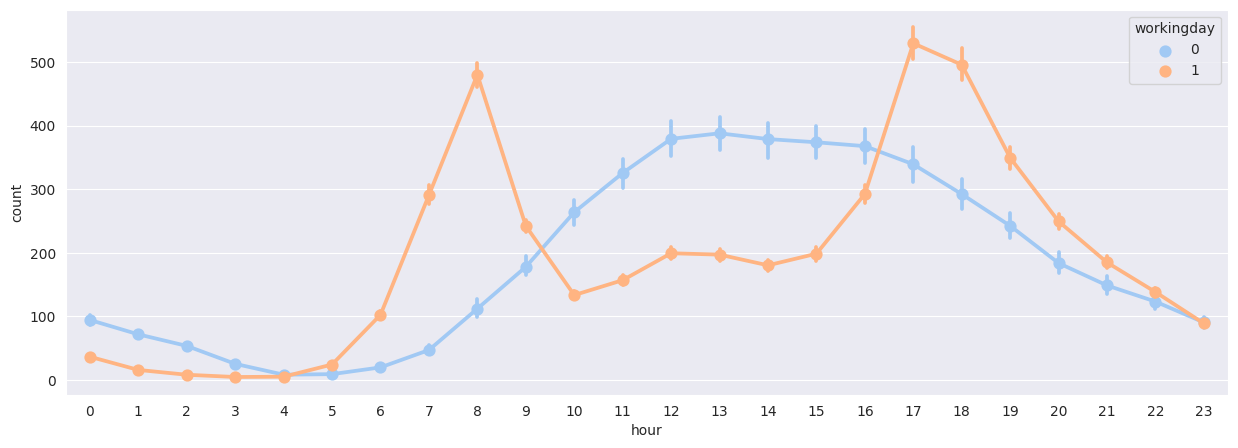

In [22]:
# workingday에 따른 시간별 자전거 수요량
    # workingday | 0=휴일, 1=주중
    # 1. 휴일여부에 따라 자전거 수요량 차이가 분명하게 나타나며, 이용 시간대 또한 분명하게 차이남 
plt.figure(figsize=(15,5))
sns.pointplot(data=train_df, x='hour', y='count', hue='workingday')

<Axes: xlabel='hour', ylabel='count'>

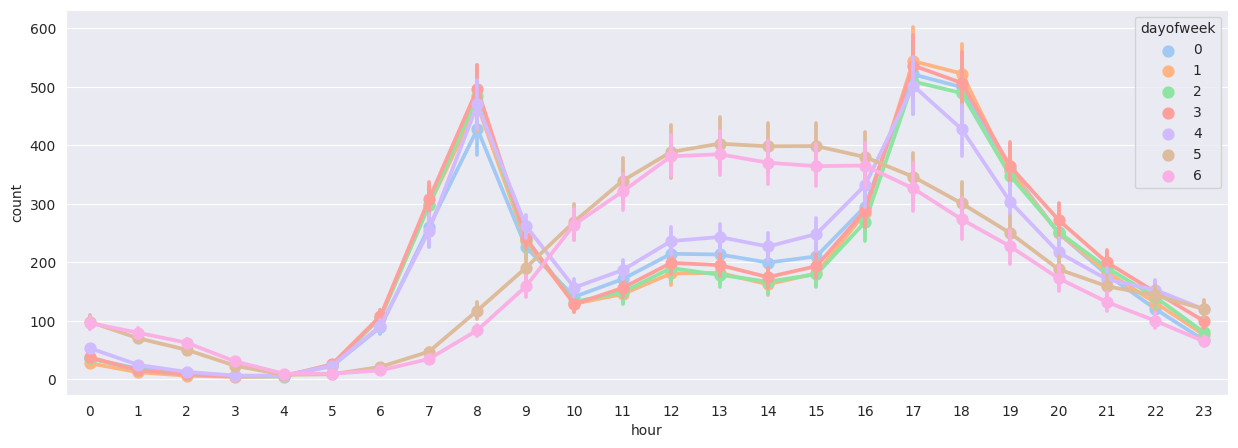

In [23]:
# dayofweek에 따른 시간별 자전거 수요량
    # 1. 요일에 따른 자전거 수요량 변화는 wprkingday의 데이터 분포와 유사함
    # 2. 요일별 자전거 수요량 차이에서 주목해 볼만한 부분은 월요일(0)과 금요일(4)으로 볼 수 있음

plt.figure(figsize=(15,5))
sns.pointplot(data=train_df, x='hour', y='count', hue='dayofweek')

<Axes: xlabel='hour', ylabel='count'>

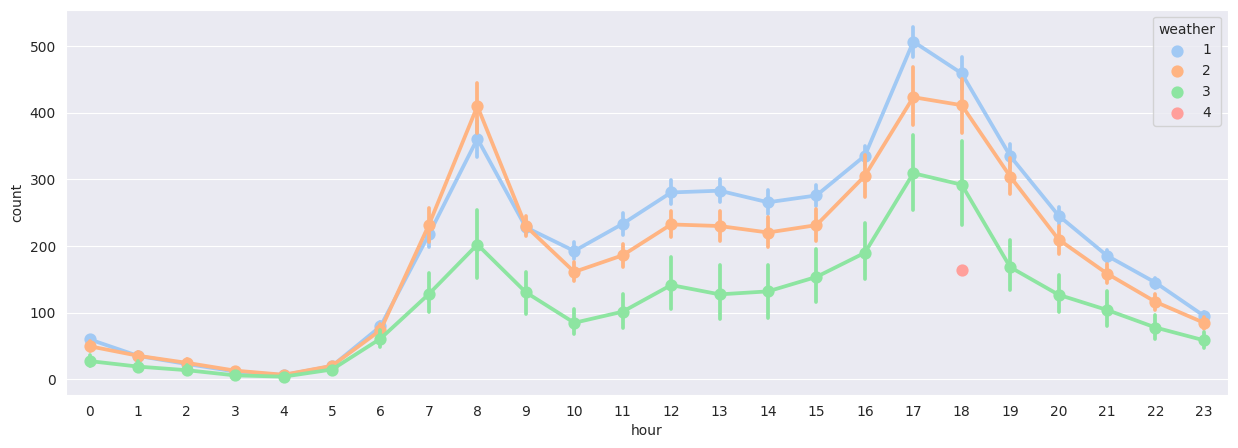

In [24]:
# waather에 따른 시간별 자전거 수요량
    # weather | 1=맑음,구름, 2=안개,흐림, 3=눈,비, 4=심한 눈,비,천둥.번개
    # 1. 날씨가 안 좋아질수록 자전거 수요량이 달라짐 
    # 2. 눈/비 등 기상이 매우 좋지 않은 경우는 아닌 경우보다 자전거 수요량이 낮음 
    # 3. 오전 시간대(7-9)의 맑음,구름(1)과 안개,흐림(2)의 수요량이 오후 시간대(16-19)와 반대의 분포를 보임
        # 3.1. 예상으로는 안개의 유무에 따른 데이터 분포 차이가 영향이 있다고 생각함 
plt.figure(figsize=(15,5))
sns.pointplot(data=train_df, x='hour', y='count', hue='weather')

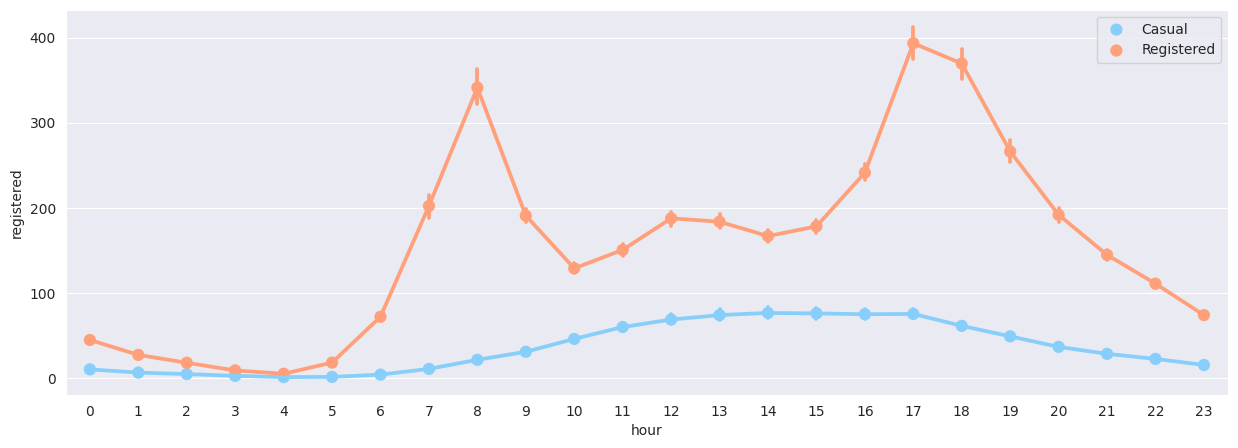

In [25]:
# 등록여부에 따른 시간별 자전거 수요량 
    # 1. 등록 여부에 따라 자전거 시간별 자전거 수요량의 차이가 분명하게 나타남
    # 2. 등록 사용자의 경우 출퇴근 시간에 자전거 수요량이 급격히 늘어난다는 특징이 있음
    # 3. 미등록 사용자의 경우 시간별 자전거 수요량의 차이가 크지 않음 
plt.figure(figsize=(15,5))

sns.pointplot(data=train_df, x='hour', y='casual', label='Casual', color='lightskyblue')
sns.pointplot(data=train_df, x='hour', y='registered', label='Registered',color='lightsalmon')

plt.legend()


# **이상치 처리**

Text(0.5, 1.0, 'Count')

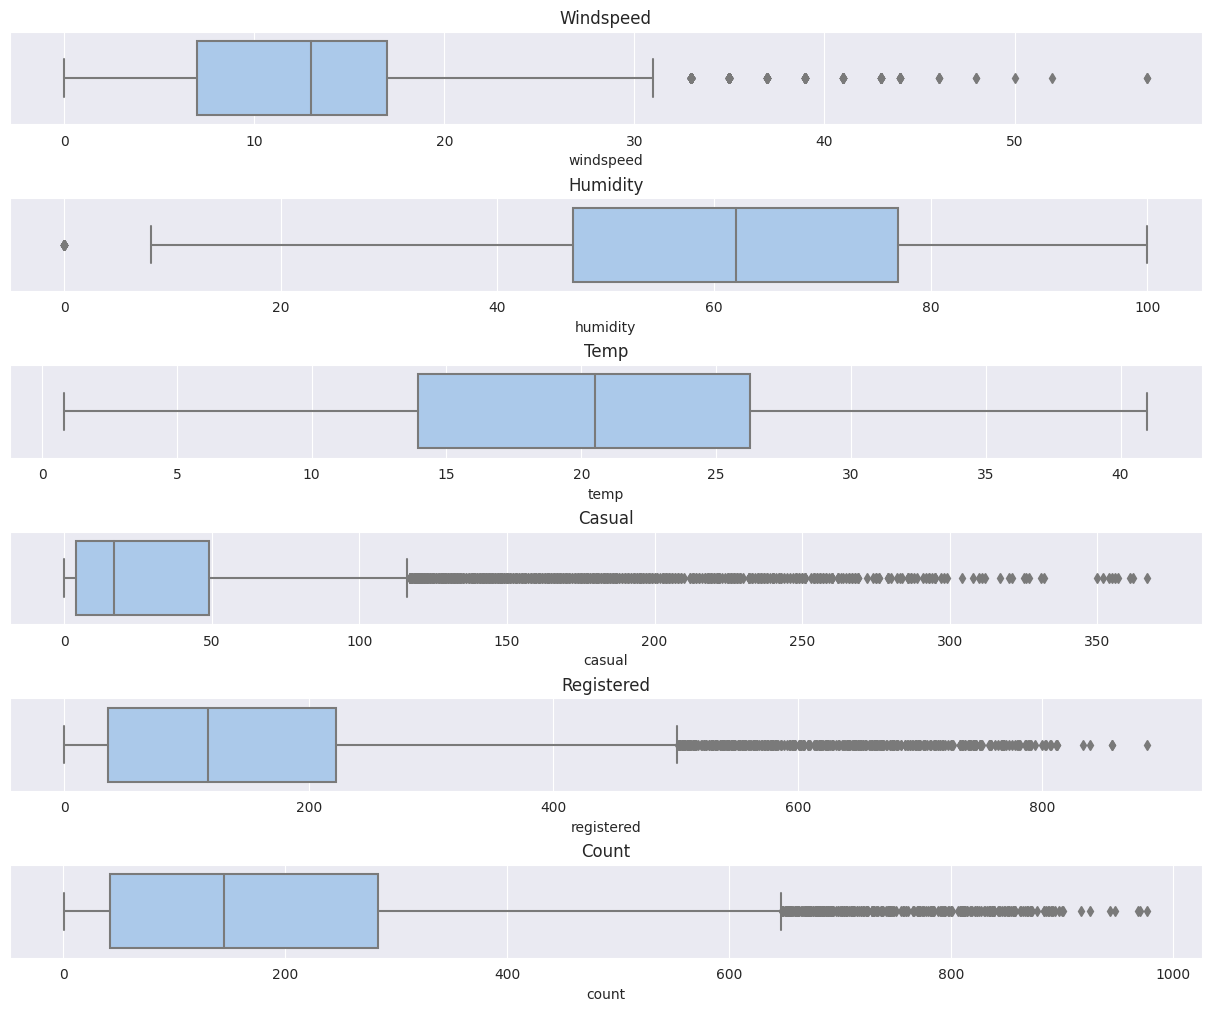

In [26]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, figsize=(12,10), constrained_layout=True)

sns.boxplot(data=train_df, x='windspeed', ax=ax1)
ax1.set_title('Windspeed')

sns.boxplot(data=train_df, x='humidity', ax=ax2)
ax2.set_title('Humidity')

sns.boxplot(data=train_df, x='temp', ax=ax3)
ax3.set_title('Temp')

sns.boxplot(data=train_df, x='casual', ax=ax4)
ax4.set_title('Casual')

sns.boxplot(data=train_df, x='registered', ax=ax5)
ax5.set_title('Registered')

sns.boxplot(data=train_df, x='count', ax=ax6)
ax6.set_title('Count')

In [27]:
from collections import Counter

print(f'before: {train_df.shape}')

def detect_outliers(data, n, cols):
    """
    IQR 기반 이상치 검출 함수

    Args:
        data: DataFrame
        n: 이상치로 판정될 최소 컬럼 수
        cols: 이상치를 검출할 컬럼 리스트

    Returns:
        이상치로 판정된 인덱스 리스트
    """

    outlier_indices = []
    for col in cols:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    # 각 인덱스가 이상치로 판정된 횟수 계산
    outlier_counts = Counter(outlier_indices)
    
    # 지정된 임계값 이상으로 여러 컬럼에서 이상치로 판정된 인덱스 추출
    multiple_outliers = [k for k, v in outlier_counts.items() if v >= n]
    
    return multiple_outliers

# 예시 사용법
Outliers_to_drop = detect_outliers(train_df, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])

# 이상치 drop
train_df = train_df.drop(Outliers_to_drop, axis=0).reset_index(drop=True)
print(f'after: {train_df.shape}')


before: (10886, 19)
after: (10573, 19)


In [28]:
# 왜도/첨도 확인 
    # 별도의 데이터 처리는 진행하지 않음 
for col in numerical_col:
    print('{:15}'.format(col),
          'Skewness: {:05.2f}'.format(train_df[col].skew()),
          '   ',
          'Kurtosis: {:06.2f}'.format(train_df[col].kurt())
         )

season          Skewness: 00.00     Kurtosis: -01.37
holiday         Skewness: 05.59     Kurtosis: 029.26
workingday      Skewness: -0.76     Kurtosis: -01.43
weather         Skewness: 01.23     Kurtosis: 000.36
temp            Skewness: 00.03     Kurtosis: -00.91
atemp           Skewness: -0.08     Kurtosis: -00.85
humidity        Skewness: -0.10     Kurtosis: -00.75
windspeed       Skewness: 00.57     Kurtosis: 000.56
casual          Skewness: 02.44     Kurtosis: 007.02
registered      Skewness: 01.09     Kurtosis: 000.82
count           Skewness: 00.92     Kurtosis: 000.06


In [29]:
# windspeed=0 데이터 처리(RandomForest)
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    wind0 = data.loc[data['windspeed'] == 0]
    windnot0 = data.loc[data['windspeed'] != 0]

    # windspeed는 날씨 변수이므로, 이와 관련된 날씨 변수를 통해 예측 진행 
    col = ['season', 'weather', 'temp', 'humidity', 'atemp', 'day']
    windnot0['windspeed'] = windnot0['windspeed'].astype('str')

    # windnot0을 컬럼으로 fit(0이 아닌 데이터를 통해 풍속에 대한 예측 진행)
    rf = RandomForestClassifier()
    rf.fit(windnot0[col], windnot0['windspeed'])

    # windspeed=0인 부분을 예측 
    pred_wind0 = rf.predict(X=wind0[col])

    # wind0의 windspeed 값을 pred_wind0으로 대체 
    wind0['windspeed'] = pred_wind0

    # wind0과 windnot0 통합
    data = pd.concat([windnot0, wind0])
    data.reset_index(inplace=True, drop=True)

    return data

In [30]:
train_df = predict_windspeed(train_df)
test_df = predict_windspeed(test_df)

<Axes: xlabel='windspeed', ylabel='count'>

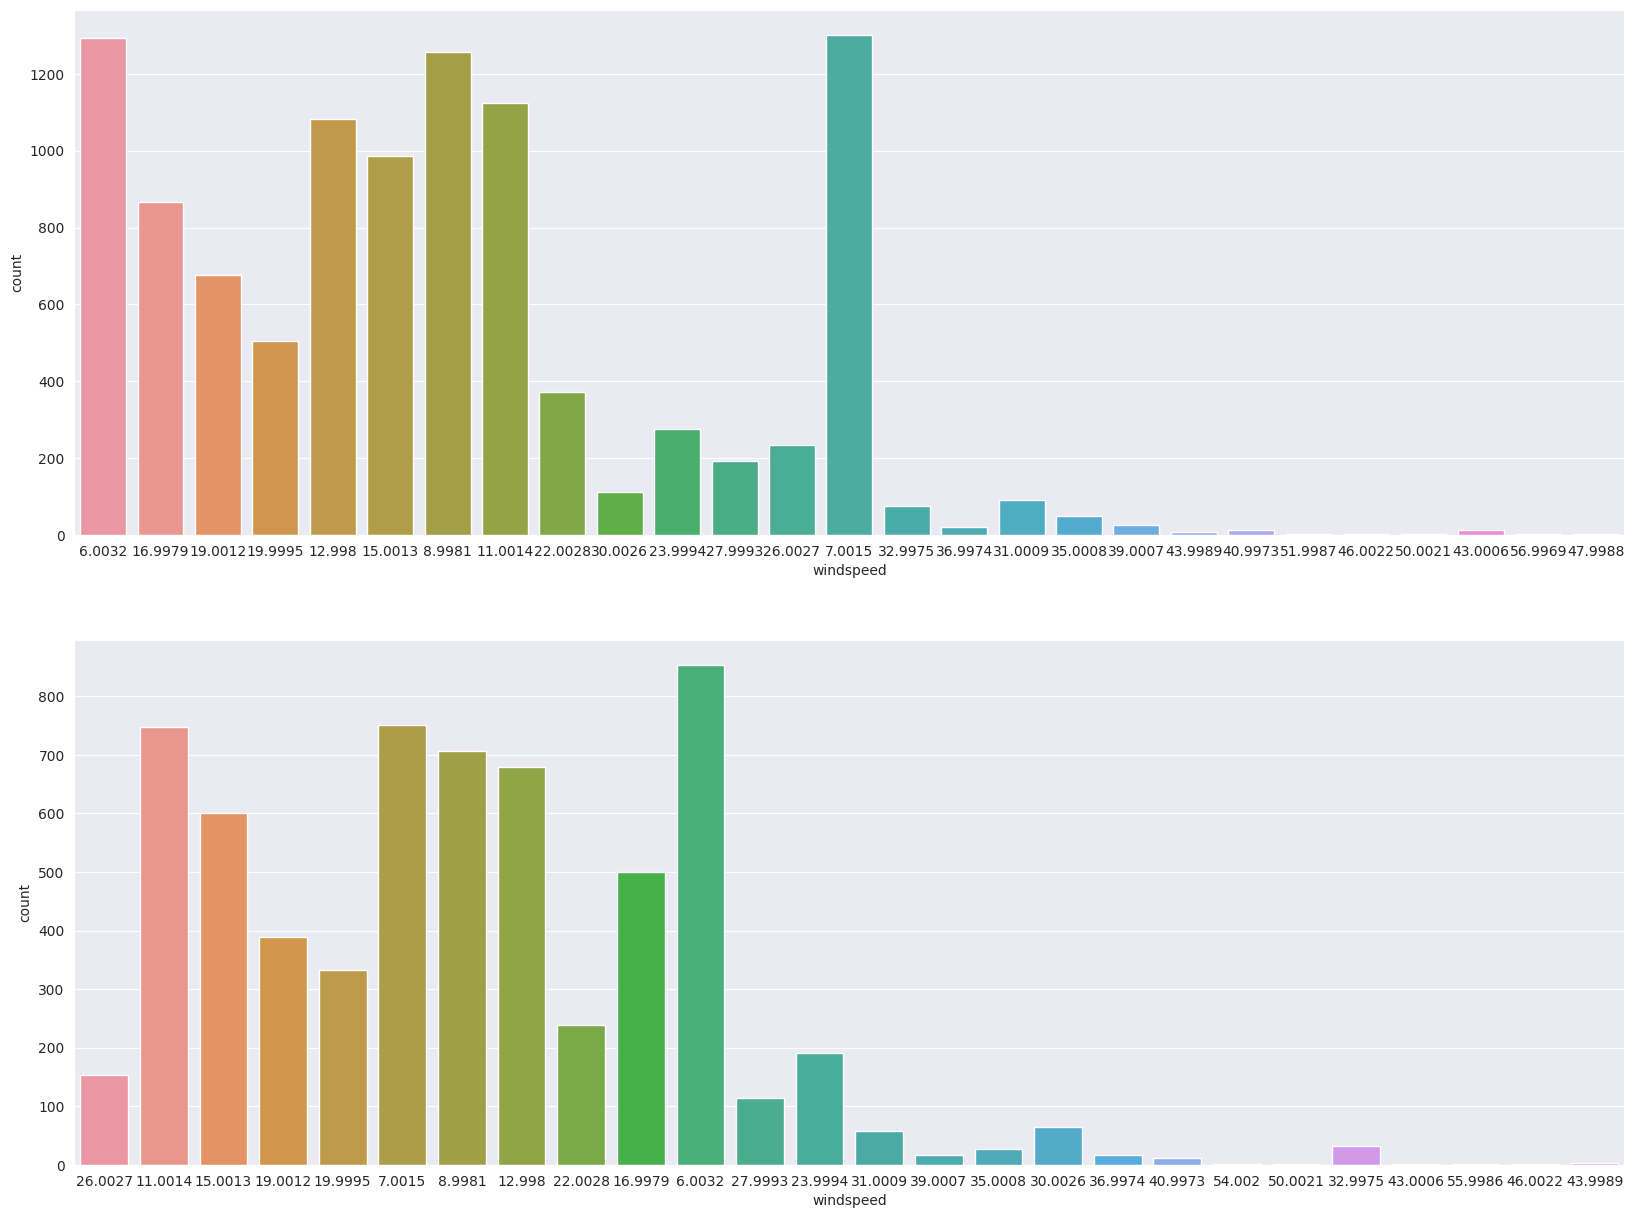

In [31]:
# 데이터 처리 진행 확인을 위한 시각화(windspeed) 

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(20, 15)

sns.countplot(data=train_df, x='windspeed', ax=ax1)
sns.countplot(data=test_df, x='windspeed', ax=ax2)

In [32]:
# One-Hot Encoding
train_df = pd.get_dummies(train_df, columns=['weather', 'season', 'holiday'])
test_df = pd.get_dummies(test_df, columns=['weather', 'season', 'holiday'])

print(f'{train_df.columns}\n\n{test_df.columns}')

Index(['datetime', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'dayofweek', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'season_1', 'season_2', 'season_3', 'season_4',
       'holiday_0', 'holiday_1'],
      dtype='object')

Index(['datetime', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'season_1',
       'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1'],
      dtype='object')


# **모델링**

In [33]:
# 데이터 전처리
    # test_datetime: submission을 위해 분리
    # drop col: 다중공선성이 의심되는 atemp와 데이터 중복 또는 의미 없는 데이터 drop 진행
test_datetime = test_df['datetime']

train_df.drop(['datetime', 'workingday', 'atemp', 'registered', 'casual', 'minute', 'second'], axis=1, inplace=True)
test_df.drop(['datetime', 'workingday', 'atemp', 'minute', 'second'], axis=1, inplace=True)


## **Gradient Boosting 모델 학습**

In [34]:
# dataset 분할 
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train = train_df.drop('count', axis=1).values
target_label = train_df['count'].values
x_test = test_df.values

x_train, x_val, y_train, y_val = train_test_split(x_train, target_label, test_size=0.2, random_state=2000)

In [35]:
# from sklearn.model_selection import GridSearchCV

# # 하이퍼파라미터 탐색 범위 설정
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10]
# }

# # 모델 생성 및 GridSearchCV 수행
# rf = RandomForestRegressor()
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # 최적의 파라미터 확인
# print(grid_search.best_params_)

In [36]:
# # 최적 모델로 예측
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# # 평가 지표 계산 
# from sklearn.metrics import mean_squared_error
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# print('RMSE:', rmse)

In [37]:
# 모델링 및 학습
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(n_estimators=2000,
                                      learning_rate=0.05,
                                      max_depth=5,
                                      min_samples_leaf=15,
                                      min_samples_split=10,
                                      random_state=42)

regressor.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=42)

In [38]:
# 모델 성능 평가
score_train = regressor.score(x_train, y_train)
score_val = regressor.score(x_val, y_val)

print('train score: %f' %score_train)
print('test score: %f' %score_val)

train score: 0.983040
test score: 0.950004


# **예측 및 제출**

In [39]:
# 예측
pred  = regressor.predict(x_test)

In [40]:
# 제출 파일 생성
submission = pd.DataFrame()
submission['datetime'] = test_datetime
submission['count'] = pred

In [41]:
submission['count'] = np.exp(submission['count'])

submission.drop('count', axis=1, inplace=True)

submission.head()

,datetime
0,2011-01-20 00:00:00
1,2011-01-20 03:00:00
2,2011-01-20 04:00:00
3,2011-01-20 05:00:00
4,2011-01-20 06:00:00


In [42]:
submission.to_csv('Bike.csv', index=False)